In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '18'
plt.rcParams['figure.dpi'] = 125
plt.rcParams['figure.facecolor'] = 'white'

import numpy as np
import xarray as xr
import nctoolkit as nc
import datetime

import os, sys

module_path = os.path.abspath(os.path.join('/Users/gilaverbuch/dev/pysst/'))
if module_path not in sys.path:
    sys.path.appendp(module_path)
from src.pysst.pysst import load_data


nctoolkit is using Climate Data Operators version 2.2.0


In [10]:
date_i = '2019-06-10T15:00'
date_f = '2019-06-11T10:00'

date_i = np.datetime64(date_i)
date_f = np.datetime64(date_f)

sst = load_data(date_i, date_f, merge=True)

Selecting data in time range 2019-06-10T15:00 -- 2019-06-11T10:00
loading first source...
loading second source...


Mean of empty slice


In [11]:
sst

<xarray.Dataset>
Dimensions:        (lon: 4500, lat: 3661, time: 4)
Coordinates:
  * lon            (lon) float64 -100.0 -99.99 -99.98 ... -50.02 -50.01 -50.0
  * lat            (lat) float64 20.0 20.01 20.02 20.03 ... 51.99 51.99 52.0
  * time           (time) datetime64[ns] 2019-06-10T19:56:00 ... 2019-06-11T0...
Data variables:
    mcsst          (time, lat, lon) float32 nan nan nan nan ... 0.15 0.15 0.15
    mcsst_source1  (time, lat, lon) float32 nan nan nan nan ... 0.15 0.15 0.15
    mcsst_source2  (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes: (12/22)
    url:                       http://www.ceoe.udel.edu, http://marine.rutger...
    groundstation:             RU-COOL L-band receiver at Rutgers University,...
    creator_name:              Matt Oliver
    creator_email:             moliver@udel.edu
    institution:               University of Delaware
    source:                    NOAA AVHRR
    ...                        ...
    publisher_url:             http://maracoos.org
    Conventions:               ACDD-1.3, CF-1.6
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    NCO:                       4.0.8
    composite_members:          20191231.2031 20191231.2031 20191231.2031 201...
    license:                   Freely Distributed

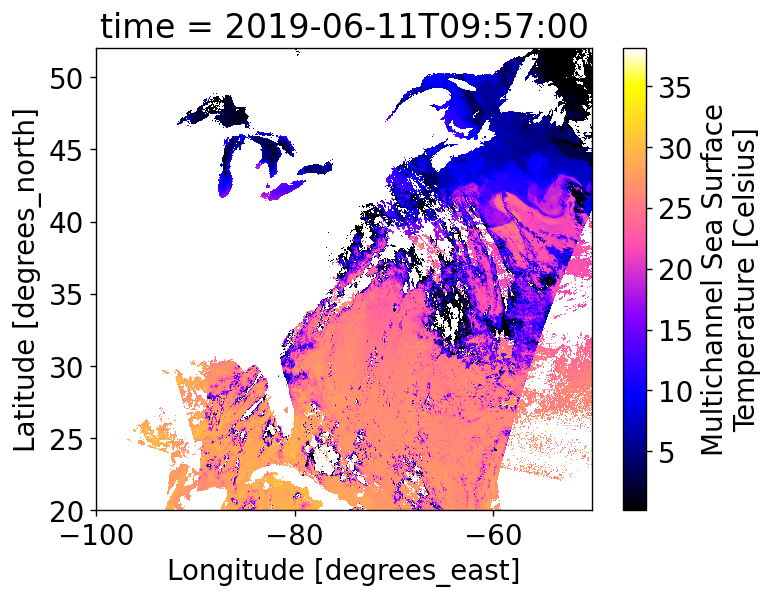

In [12]:
t=3
sst.isel(time=t).mcsst.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
sst.isel(time=t).mcsst_source1.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
sst.isel(time=t).mcsst_source2.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
def mean_sst(xr1, xr2):
    '''
    Cal;culating the mean SST of two datasets
    '''
    xr_ = xr1.copy()
    xr_.mcsst.values = np.nanmean(np.dstack((xr1.mcsst.values,xr2.mcsst.values)),2)
    
    return xr_

In [ ]:
sst_comb = 0

for t in range(0, sst[0].time.size):
    sst_temp = sst[0].isel(time=t).copy()
    a_ = []
    for i in range(0, len(sst)):
        a_.append(sst[i].isel(time=t).mcsst.values)
    temp = np.nanmean(np.dstack((a_)),len(sst))
    sst_temp.mcsst.values = temp
    
    try:
        sst_comb = xr.concat([sst_comb,sst_temp], 'time')
    except:
        sst_comb = sst_temp.copy()

In [ ]:
sst_comb

In [ ]:
t=5
sst[0].isel(time=t).mcsst.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
sst[1].isel(time=t).mcsst.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
sst_comb.isel(time=t).mcsst.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
ds1 = nc.open_thredds('http://tds.maracoos.org/thredds/dodsC/AVHRR/2019/1Agg')
dsx1 = ds1.to_xarray()
dsx1 = dsx1.sortby('time')

In [ ]:
dsx1

In [ ]:
day_avg_1 = dsx1.sel(time=slice(date_i, date_f))

In [ ]:
day_avg_1.load()

In [ ]:
ds2 = nc.open_thredds('http://basin.ceoe.udel.edu/thredds/dodsC/avhrr_unfiltered_sst.nc')
dsx2 = ds2.to_xarray()
dsx2 = dsx2.sortby('time')

In [ ]:
day_avg_2 = dsx2.sel(time=slice(date_i, date_f))

In [ ]:
day_avg_2.load()

In [ ]:
temp = day_avg_2.copy()

In [ ]:
temp.mcsst.values = day_avg_2.isel(time=1).mcsst.valu

In [ ]:
%%time
for i in range(0,2):
    temp = np.nanmean(np.dstack((day_avg_2.isel(time=i).mcsst.values,day_avg_2.isel(time=i).mcsst.values)),2)

In [ ]:
%%time
a = day_avg_1.isel(time=i).mcsst.to_numpy()
b = day_avg_1.isel(time=i).mcsst.to_numpy()

In [ ]:
a_ = xr.open_dataset("a.nc")
b_ = xr.open_dataset("b.nc")

In [ ]:
%%time
a = a_.mcsst.to_numpy()
b = b_.mcsst.to_numpy()

In [ ]:
%%time
np.nanmean(np.dstack((a,b)),2)

In [ ]:
%%time
day_avg_1 = day_avg_1.assign(mcsst2 = day_avg_2.mcsst)
for i in range(0,2):
    ds = day_avg_1.isel(time=i).copy()
    mean = ds.to_array(dim='time').mean('time')
    ds = ds.assign(new=mean)

In [ ]:
%%time
for i in range(0,2):
    a = day_avg_1.isel(time=i).mcsst.copy()
    b = day_avg_1.isel(time=i).mcsst.copy()
    
    temp = (a+b)/2


In [ ]:
day_avg_1.isel(time=i).mcsst.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
day_avg_2.isel(time=i).mcsst.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
%%time
((a+b)/2)

In [ ]:
mean = ds.to_array(dim='time').mean('time')
ds = ds.assign(new=mean)

In [ ]:
ds

In [ ]:
ds.mcsst.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
ds.mcsst2.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
ds.new.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
temp.mcsst.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
def mean_sst(xr1, xr2):
    '''
    Cal;culating the mean SST of two datasets
    '''
    xr_ = xr1.copy()
    xr_.mcsst.values = np.nanmean(np.dstack((xr1.mcsst.values,xr2.mcsst.values)),2)
    
    return xr_

def mean_sst_v2(xr1, xr2):
    '''
    Cal;culating the mean SST of two datasets
    '''
    
    xr_ = np.nanmean(np.dstack((xr1,xr2)),2)
    
    return xr_

In [ ]:
%%time
dsx = day_avg_1.copy()
days = np.arange(0,day_avg_1.time.size,1)
days = np.arange(0,5,1)

out = []
for i in days:
    
#     a = delayed(mean_sst)(day_avg_1.isel(time=i), day_avg_2.isel(time=i))
    a = delayed(mean_sst_v2)(day_avg_1.isel(time=i).mcsst.values, day_avg_2.isel(time=i).mcsst.values)
    
    out.append(a)
    
    
    

In [ ]:
%%time
out = compute(*out)

In [ ]:
out

In [ ]:
out = xr.concat(out, 'time')

In [ ]:
out.isel(time=4).mcsst.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
i=0
temp = xr.merge([day_avg_2.isel(time=i), day_avg_1.isel(time=i)], join="outer")

In [ ]:
temp.mcsst.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
day_avg_1.isel(time=i).mcsst.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
day_avg_2.isel(time=i).mcsst.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
    dsx.isel(time=i).mcsst.values = np.nanmean(np.dstack((day_avg_1.isel(time=i).mcsst.values,
                                                          day_avg_2.isel(time=i).mcsst.values)),2)

In [ ]:
dsx.isel(time=5).mcsst.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
dsx3 = day_avg_1.copy()


dsx3.mcsst.values = np.nanmean(np.dstack((day_avg_1.mcsst.values,day_avg_2.mcsst.values)),2)

In [ ]:
dsx1 = dsx1.sel(time=date, method='nearest', drop=True)


In [ ]:
# dsx1 = dsx1.sel(time=date, method='nearest')
dsx2 = dsx2.sel(time=date, method='nearest')

In [ ]:
dsx2

In [ ]:
dsx2

In [ ]:
dsx1.mcsst.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
dsx2.mcsst.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
dsx3 = dsx1.copy()

In [ ]:
dsx3.mcsst.values = np.nanmean(np.dstack((dsx1.mcsst.values,dsx2.mcsst.values)),2)

In [ ]:
dsx3

In [ ]:
dsx3.mcsst.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
date = '2019-01-10T15:00'
date = np.datetime64(date)

In [ ]:
t 

In [ ]:
date = '2019-07-01T10:00'
t = np.datetime64(date)

dsx1 = dsx1.sel(time=t, method='nearest')

In [ ]:
dsx1.mcsst.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
day_ang = dsx1.sel(time=slice('2019-07-01', '2019-07-01'))

In [ ]:
day_ang = dsx1.sel(time=slice('2019-07-01', '2019-07-01')).groupby('time.day').mean('time')

In [ ]:
day_ang

In [ ]:
day_ang.mcsst.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
abstime = np.abs(dsx.time-t)
abstime = np.timedelta64(abstime.time.values[0], 'h')
t_loc = np.where(abstime<=1)

# # Now I can use that index location to get the values at the x/y diminsion
# point_ds = ds.sel(x=xloc, y=yloc)

In [ ]:
abstime.time.values[0]

In [ ]:
a = xr_ds.isel(time=1500)

In [ ]:
a.mcsst.plot()

In [ ]:
d = a.mcsst.values.copy()
lat = a.lat.values.copy()
lon = a.lon.values.copy()
plt.figure(figsize=(15,10))
plt.pcolormesh(lon, lat,d, cmap='gnuplot2')
plt.clim(5,35)
plt.colorbar(label='Temp [c]')
plt.show()

In [ ]:
d = a.mcsst.values.copy()

In [ ]:
a.lat